# **Cleaning and Visualization for Fitness Dataset - Bellabeat**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate

# **Understanding the Data, Data Cleaning & Data Transformation**

In [2]:
import os
import pandas as pd

# Directory path on Kaggle
base_path = '/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16'

# Dictionary to hold the DataFrames
dataframes = {}

# Loop through the directory and read each CSV file into a DataFrame
for filename in os.listdir(base_path):
    if filename.endswith('.csv'):
        # Full file path
        file_path = os.path.join(base_path, filename)
        # Name the DataFrame key without the '.csv' extension
        df_name = filename.replace('.csv', '')
        # Read the CSV and store it in the dictionary
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {df_name} into dataframes['{df_name}']")


Loaded minuteCaloriesNarrow_merged into dataframes['minuteCaloriesNarrow_merged']
Loaded weightLogInfo_merged into dataframes['weightLogInfo_merged']
Loaded sleepDay_merged into dataframes['sleepDay_merged']
Loaded dailyIntensities_merged into dataframes['dailyIntensities_merged']
Loaded minuteIntensitiesWide_merged into dataframes['minuteIntensitiesWide_merged']
Loaded minuteMETsNarrow_merged into dataframes['minuteMETsNarrow_merged']
Loaded dailyCalories_merged into dataframes['dailyCalories_merged']
Loaded hourlyCalories_merged into dataframes['hourlyCalories_merged']
Loaded heartrate_seconds_merged into dataframes['heartrate_seconds_merged']
Loaded minuteSleep_merged into dataframes['minuteSleep_merged']
Loaded hourlyIntensities_merged into dataframes['hourlyIntensities_merged']
Loaded hourlySteps_merged into dataframes['hourlySteps_merged']
Loaded minuteStepsNarrow_merged into dataframes['minuteStepsNarrow_merged']
Loaded dailySteps_merged into dataframes['dailySteps_merged']
Load

# **1. merged_daily**

In [3]:
df_data1 = dataframes['dailyActivity_merged']
df_data2 = dataframes['dailyCalories_merged']
df_data3 = dataframes['dailyIntensities_merged']
df_data4 = dataframes['dailySteps_merged']

In [4]:
merged_daily = pd.concat([df_data1, df_data2, df_data3, df_data4], axis=1)

merged_daily

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,328,13,25,0.00,6.06,0.55,1.88,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,217,19,21,0.00,4.71,0.69,1.57,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,181,11,30,0.00,3.91,0.40,2.44,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,209,34,29,0.00,2.83,1.26,2.14,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,221,10,36,0.00,5.04,0.41,2.71,1503960366,4/16/2016,12669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,245,4,17,0.00,6.80,0.20,1.08,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,217,19,73,0.05,6.24,0.80,11.10,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,224,11,18,0.00,6.28,0.46,1.35,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,213,12,88,0.00,5.89,0.41,13.22,8877689391,5/11/2016,21420


In [5]:
merged_daily.shape

(940, 31)

In [6]:
merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
merged_daily.duplicated().sum()

0

In [8]:
duplicate_columns = merged_daily.columns[merged_daily.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index(['Id', 'Calories', 'ActivityDay', 'SedentaryMinutes',
       'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
       'SedentaryActiveDistance', 'LightActiveDistance',
       'ModeratelyActiveDistance', 'VeryActiveDistance'],
      dtype='object')


In [9]:
merged_daily = merged_daily.loc[:, ~merged_daily.columns.duplicated()]

merged_daily

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,4/12/2016,13162
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,4/13/2016,10735
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,4/14/2016,10460
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,4/15/2016,9762
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,4/16/2016,12669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,5/8/2016,10686
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,5/9/2016,20226
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,5/10/2016,10733
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,5/11/2016,21420


In [10]:
merged_daily.shape

(940, 17)

In [11]:
merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [12]:
#Here convert date into corresponding Day

# Convert 'ActivityDay' to datetime format
merged_daily['ActivityDay'] = pd.to_datetime(merged_daily['ActivityDay'], format='%m/%d/%Y', errors='coerce')

# Step 2: Replace 'ActivityDay' with day names
merged_daily['ActivityDay'] = merged_daily['ActivityDay'].dt.day_name()

/tmp/ipykernel_17/3077353680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_daily['ActivityDay'] = pd.to_datetime(merged_daily['ActivityDay'], format='%m/%d/%Y', errors='coerce')
/tmp/ipykernel_17/3077353680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_daily['ActivityDay'] = merged_daily['ActivityDay'].dt.day_name()


In [13]:
#  Converting ActivityDate datatype into datetime64[ns]
merged_daily['ActivityDate'] = pd.to_datetime(merged_daily['ActivityDate'], format='%m/%d/%Y', errors='coerce')

/tmp/ipykernel_17/3194419912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_daily['ActivityDate'] = pd.to_datetime(merged_daily['ActivityDate'], format='%m/%d/%Y', errors='coerce')


In [14]:
merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [15]:
merged_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,13162
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,10735
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,10460
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,9762
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,12669


In [16]:
merged_daily.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
ActivityDay                 0
StepTotal                   0
dtype: int64

# **2. merged_hourly**

In [17]:
df_data5 = dataframes['hourlyCalories_merged']
df_data6 = dataframes['hourlySteps_merged']
df_data7 = dataframes['hourlyIntensities_merged']

In [18]:
merged_hourly = pd.concat([df_data5, df_data6, df_data7], axis=1)

merged_hourly

,Id,ActivityHour,Calories,Id,ActivityHour,StepTotal,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,81,1503960366,4/12/2016 12:00:00 AM,373,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,61,1503960366,4/12/2016 1:00:00 AM,160,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,59,1503960366,4/12/2016 2:00:00 AM,151,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,47,1503960366,4/12/2016 3:00:00 AM,0,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,48,1503960366,4/12/2016 4:00:00 AM,0,1503960366,4/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126,8877689391,5/12/2016 10:00:00 AM,514,8877689391,5/12/2016 10:00:00 AM,12,0.200000
22095,8877689391,5/12/2016 11:00:00 AM,192,8877689391,5/12/2016 11:00:00 AM,1407,8877689391,5/12/2016 11:00:00 AM,29,0.483333
22096,8877689391,5/12/2016 12:00:00 PM,321,8877689391,5/12/2016 12:00:00 PM,3135,8877689391,5/12/2016 12:00:00 PM,93,1.550000
22097,8877689391,5/12/2016 1:00:00 PM,101,8877689391,5/12/2016 1:00:00 PM,307,8877689391,5/12/2016 1:00:00 PM,6,0.100000


In [19]:
merged_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   Id                22099 non-null  int64  
 4   ActivityHour      22099 non-null  object 
 5   StepTotal         22099 non-null  int64  
 6   Id                22099 non-null  int64  
 7   ActivityHour      22099 non-null  object 
 8   TotalIntensity    22099 non-null  int64  
 9   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.7+ MB


In [20]:
merged_hourly.duplicated().sum()

0

In [21]:
duplicate_columns1 = merged_hourly.columns[merged_hourly.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns1)

Duplicate columns: Index(['Id', 'ActivityHour'], dtype='object')


In [22]:
merged_hourly = merged_hourly.loc[:, ~merged_hourly.columns.duplicated()]

merged_hourly

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,81,373,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,61,160,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,59,151,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,47,0,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,48,0,0,0.000000
...,...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126,514,12,0.200000
22095,8877689391,5/12/2016 11:00:00 AM,192,1407,29,0.483333
22096,8877689391,5/12/2016 12:00:00 PM,321,3135,93,1.550000
22097,8877689391,5/12/2016 1:00:00 PM,101,307,6,0.100000


In [23]:
merged_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   StepTotal         22099 non-null  int64  
 4   TotalIntensity    22099 non-null  int64  
 5   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ MB


In [24]:
# Here Dataype of ActivityHour change to datetime64[ns]
merged_hourly['ActivityHour'] = pd.to_datetime(merged_hourly['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

/tmp/ipykernel_17/2664077522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_hourly['ActivityHour'] = pd.to_datetime(merged_hourly['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')


In [25]:
merged_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   StepTotal         22099 non-null  int64         
 4   TotalIntensity    22099 non-null  int64         
 5   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


In [26]:
merged_hourly.head()

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,81,373,20,0.333333
1,1503960366,2016-04-12 01:00:00,61,160,8,0.133333
2,1503960366,2016-04-12 02:00:00,59,151,7,0.116667
3,1503960366,2016-04-12 03:00:00,47,0,0,0.000000
4,1503960366,2016-04-12 04:00:00,48,0,0,0.000000


In [27]:
merged_hourly.isna().sum()

Id                  0
ActivityHour        0
Calories            0
StepTotal           0
TotalIntensity      0
AverageIntensity    0
dtype: int64

# **3. merged_minute_narrow**

In [28]:
df_data8 = dataframes['minuteMETsNarrow_merged']
df_data9 = dataframes['minuteIntensitiesNarrow_merged']
df_data10 = dataframes['minuteCaloriesNarrow_merged']
df_data11 = dataframes['minuteStepsNarrow_merged']

In [29]:
merged_minute_narrow = pd.concat([df_data8, df_data9, df_data10, df_data11], axis=1)

merged_minute_narrow

,Id,ActivityMinute,METs,Id,ActivityMinute,Intensity,Id,ActivityMinute,Calories,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,10,1503960366,4/12/2016 12:00:00 AM,0,1503960366,4/12/2016 12:00:00 AM,0.78650,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,10,1503960366,4/12/2016 12:01:00 AM,0,1503960366,4/12/2016 12:01:00 AM,0.78650,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,10,1503960366,4/12/2016 12:02:00 AM,0,1503960366,4/12/2016 12:02:00 AM,0.78650,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,10,1503960366,4/12/2016 12:03:00 AM,0,1503960366,4/12/2016 12:03:00 AM,0.78650,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,10,1503960366,4/12/2016 12:04:00 AM,0,1503960366,4/12/2016 12:04:00 AM,0.78650,1503960366,4/12/2016 12:04:00 AM,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11,8877689391,5/12/2016 1:55:00 PM,0,8877689391,5/12/2016 1:55:00 PM,1.33353,8877689391,5/12/2016 1:55:00 PM,0
1325576,8877689391,5/12/2016 1:56:00 PM,11,8877689391,5/12/2016 1:56:00 PM,0,8877689391,5/12/2016 1:56:00 PM,1.33353,8877689391,5/12/2016 1:56:00 PM,0
1325577,8877689391,5/12/2016 1:57:00 PM,11,8877689391,5/12/2016 1:57:00 PM,0,8877689391,5/12/2016 1:57:00 PM,1.33353,8877689391,5/12/2016 1:57:00 PM,0
1325578,8877689391,5/12/2016 1:58:00 PM,11,8877689391,5/12/2016 1:58:00 PM,0,8877689391,5/12/2016 1:58:00 PM,1.33353,8877689391,5/12/2016 1:58:00 PM,0


In [30]:
merged_minute_narrow.shape

(1325580, 12)

In [31]:
merged_minute_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   METs            1325580 non-null  int64  
 3   Id              1325580 non-null  int64  
 4   ActivityMinute  1325580 non-null  object 
 5   Intensity       1325580 non-null  int64  
 6   Id              1325580 non-null  int64  
 7   ActivityMinute  1325580 non-null  object 
 8   Calories        1325580 non-null  float64
 9   Id              1325580 non-null  int64  
 10  ActivityMinute  1325580 non-null  object 
 11  Steps           1325580 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 121.4+ MB


In [32]:
duplicate_columns2 = merged_minute_narrow.columns[merged_minute_narrow.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns2)

Duplicate columns: Index(['Id', 'ActivityMinute'], dtype='object')


In [33]:
merged_minute_narrow = merged_minute_narrow.loc[:, ~merged_minute_narrow.columns.duplicated()]

merged_minute_narrow

,Id,ActivityMinute,METs,Intensity,Calories,Steps
0,1503960366,4/12/2016 12:00:00 AM,10,0,0.78650,0
1,1503960366,4/12/2016 12:01:00 AM,10,0,0.78650,0
2,1503960366,4/12/2016 12:02:00 AM,10,0,0.78650,0
3,1503960366,4/12/2016 12:03:00 AM,10,0,0.78650,0
4,1503960366,4/12/2016 12:04:00 AM,10,0,0.78650,0
...,...,...,...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11,0,1.33353,0
1325576,8877689391,5/12/2016 1:56:00 PM,11,0,1.33353,0
1325577,8877689391,5/12/2016 1:57:00 PM,11,0,1.33353,0
1325578,8877689391,5/12/2016 1:58:00 PM,11,0,1.33353,0


In [34]:
merged_minute_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   METs            1325580 non-null  int64  
 3   Intensity       1325580 non-null  int64  
 4   Calories        1325580 non-null  float64
 5   Steps           1325580 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 60.7+ MB


In [35]:
# Convert datatype of ActivityMinute to datetime64[ns]
merged_minute_narrow['ActivityMinute'] = pd.to_datetime(merged_minute_narrow['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')

/tmp/ipykernel_17/1190652931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_minute_narrow['ActivityMinute'] = pd.to_datetime(merged_minute_narrow['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')


In [36]:
merged_minute_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  int64         
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   METs            1325580 non-null  int64         
 3   Intensity       1325580 non-null  int64         
 4   Calories        1325580 non-null  float64       
 5   Steps           1325580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 60.7 MB


In [37]:
merged_minute_narrow.head()

,Id,ActivityMinute,METs,Intensity,Calories,Steps
0,1503960366,2016-04-12 00:00:00,10,0,0.7865,0
1,1503960366,2016-04-12 00:01:00,10,0,0.7865,0
2,1503960366,2016-04-12 00:02:00,10,0,0.7865,0
3,1503960366,2016-04-12 00:03:00,10,0,0.7865,0
4,1503960366,2016-04-12 00:04:00,10,0,0.7865,0


In [38]:
merged_minute_narrow.duplicated().sum()

0

In [39]:
merged_minute_narrow.isna().sum()

Id                0
ActivityMinute    0
METs              0
Intensity         0
Calories          0
Steps             0
dtype: int64

# **4. merged_minute_wide**

In [40]:
df_data12 = dataframes['minuteIntensitiesWide_merged']
df_data13 = dataframes['minuteCaloriesWide_merged']
df_data14 = dataframes['minuteStepsWide_merged']

In [41]:
merged_minute_wide = pd.concat([df_data12, df_data13, df_data14], axis=1)

merged_minute_wide

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,21,22,33,17,24,0,0,20,38,16


In [42]:
merged_minute_wide.shape

(21645, 186)

In [43]:
merged_minute_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Columns: 186 entries, Id to Steps59
dtypes: float64(60), int64(123), object(3)
memory usage: 30.7+ MB


In [44]:
print(merged_minute_wide.columns.tolist())

['Id', 'ActivityHour', 'Intensity00', 'Intensity01', 'Intensity02', 'Intensity03', 'Intensity04', 'Intensity05', 'Intensity06', 'Intensity07', 'Intensity08', 'Intensity09', 'Intensity10', 'Intensity11', 'Intensity12', 'Intensity13', 'Intensity14', 'Intensity15', 'Intensity16', 'Intensity17', 'Intensity18', 'Intensity19', 'Intensity20', 'Intensity21', 'Intensity22', 'Intensity23', 'Intensity24', 'Intensity25', 'Intensity26', 'Intensity27', 'Intensity28', 'Intensity29', 'Intensity30', 'Intensity31', 'Intensity32', 'Intensity33', 'Intensity34', 'Intensity35', 'Intensity36', 'Intensity37', 'Intensity38', 'Intensity39', 'Intensity40', 'Intensity41', 'Intensity42', 'Intensity43', 'Intensity44', 'Intensity45', 'Intensity46', 'Intensity47', 'Intensity48', 'Intensity49', 'Intensity50', 'Intensity51', 'Intensity52', 'Intensity53', 'Intensity54', 'Intensity55', 'Intensity56', 'Intensity57', 'Intensity58', 'Intensity59', 'Id', 'ActivityHour', 'Calories00', 'Calories01', 'Calories02', 'Calories03',

In [45]:
duplicate_columns3 = merged_minute_wide.columns[merged_minute_wide.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns3)

Duplicate columns: Index(['Id', 'ActivityHour'], dtype='object')


In [46]:
merged_minute_wide = merged_minute_wide.loc[:, ~merged_minute_wide.columns.duplicated()]

merged_minute_wide

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,21,22,33,17,24,0,0,20,38,16


In [47]:
merged_minute_wide['ActivityHour'].dtype

dtype('O')

In [48]:
 # Convert datatype of ActivityHour to datetime64[ns]
merged_minute_wide['ActivityHour'] = pd.to_datetime(merged_minute_wide['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

/tmp/ipykernel_17/2510858159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_minute_wide['ActivityHour'] = pd.to_datetime(merged_minute_wide['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')


In [49]:
print(merged_minute_wide.columns.tolist())

['Id', 'ActivityHour', 'Intensity00', 'Intensity01', 'Intensity02', 'Intensity03', 'Intensity04', 'Intensity05', 'Intensity06', 'Intensity07', 'Intensity08', 'Intensity09', 'Intensity10', 'Intensity11', 'Intensity12', 'Intensity13', 'Intensity14', 'Intensity15', 'Intensity16', 'Intensity17', 'Intensity18', 'Intensity19', 'Intensity20', 'Intensity21', 'Intensity22', 'Intensity23', 'Intensity24', 'Intensity25', 'Intensity26', 'Intensity27', 'Intensity28', 'Intensity29', 'Intensity30', 'Intensity31', 'Intensity32', 'Intensity33', 'Intensity34', 'Intensity35', 'Intensity36', 'Intensity37', 'Intensity38', 'Intensity39', 'Intensity40', 'Intensity41', 'Intensity42', 'Intensity43', 'Intensity44', 'Intensity45', 'Intensity46', 'Intensity47', 'Intensity48', 'Intensity49', 'Intensity50', 'Intensity51', 'Intensity52', 'Intensity53', 'Intensity54', 'Intensity55', 'Intensity56', 'Intensity57', 'Intensity58', 'Intensity59', 'Calories00', 'Calories01', 'Calories02', 'Calories03', 'Calories04', 'Calori

In [50]:
merged_minute_wide['ActivityHour'].dtype

dtype('<M8[ns]')

In [51]:
merged_minute_wide.duplicated().sum()

0

In [52]:
merged_minute_wide.isna().sum()

Id              0
ActivityHour    0
Intensity00     0
Intensity01     0
Intensity02     0
               ..
Steps55         0
Steps56         0
Steps57         0
Steps58         0
Steps59         0
Length: 182, dtype: int64

# **5. heartrate_seconds**

In [53]:
heartrate_seconds = dataframes['heartrate_seconds_merged']
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [54]:
heartrate_seconds.shape

(2483658, 3)

In [55]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [56]:
 # Convert datatype of Time to datetime64[ns]
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])

In [57]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [58]:
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [59]:
heartrate_seconds.duplicated().sum()

0

In [60]:
heartrate_seconds.isna().sum()

Id       0
Time     0
Value    0
dtype: int64

# **6. minuteSleep**

In [61]:
minuteSleep = dataframes['minuteSleep_merged']
minuteSleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [62]:
minuteSleep.shape

(188521, 4)

In [63]:
minuteSleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


In [64]:
 # Convert datatype of Date to datetime64[ns]
minuteSleep['date'] = pd.to_datetime(minuteSleep['date'])

In [65]:
minuteSleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Id      188521 non-null  int64         
 1   date    188521 non-null  datetime64[ns]
 2   value   188521 non-null  int64         
 3   logId   188521 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.8 MB


In [66]:
minuteSleep.head()

,Id,date,value,logId
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


In [67]:
minuteSleep.duplicated().sum()

543

In [68]:
minuteSleep.isna().sum()

Id       0
date     0
value    0
logId    0
dtype: int64

# **7. weightLogInfo**

In [69]:
weightLogInfo = dataframes['weightLogInfo_merged']
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [70]:
weightLogInfo.shape

(67, 8)

In [71]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [72]:
 # Convert datatype of Date to datetime64[ns]
weightLogInfo['Date'] = pd.to_datetime(weightLogInfo['Date'])

/tmp/ipykernel_17/2744328361.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weightLogInfo['Date'] = pd.to_datetime(weightLogInfo['Date'])


In [73]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [74]:
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [75]:
weightLogInfo.duplicated().sum()

0

In [76]:
weightLogInfo.isna().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [77]:
weightLogInfo['Fat'].unique()

array([22., nan, 25.])

In [78]:
# Drop Fat column - Most of data are NaN
weightLogInfo = weightLogInfo.drop('Fat',axis=True)

In [79]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 3.3 KB


In [80]:
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000


# **8. sleepDay**

In [81]:
sleepDay = dataframes['sleepDay_merged']
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [82]:
sleepDay.shape

(413, 5)

In [83]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [84]:
 # Convert datatype of SleepDay to datetime64[ns]
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'], format='%m/%d/%Y %H:%M:%S %p')

In [85]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [86]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 12:00:00,1,327,346
1,1503960366,2016-04-13 12:00:00,2,384,407
2,1503960366,2016-04-15 12:00:00,1,412,442
3,1503960366,2016-04-16 12:00:00,2,340,367
4,1503960366,2016-04-17 12:00:00,1,700,712


In [87]:
sleepDay.duplicated().sum()

3

In [88]:
sleepDay.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

# **Visualization**

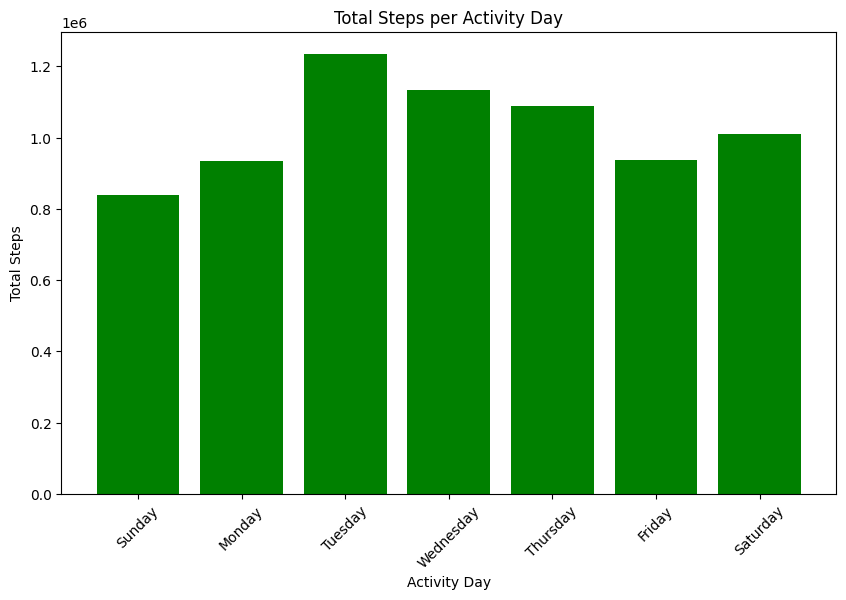

In [89]:
# Define the correct order for days of the week
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Ensure 'ActivityDay' is a categorical variable with the specified order
merged_daily.loc[:,'ActivityDay'] = pd.Categorical(merged_daily['ActivityDay'], categories=days_order, ordered=True)

# Group by 'ActivityDay' and sum 'StepTotal'
grouped_data = merged_daily.groupby('ActivityDay', observed=False)['StepTotal'].sum().reindex(days_order).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['ActivityDay'], grouped_data['StepTotal'], color='green')
plt.xlabel('Activity Day')
plt.ylabel('Total Steps')
plt.title('Total Steps per Activity Day')
plt.xticks(rotation=45)

plt.show()

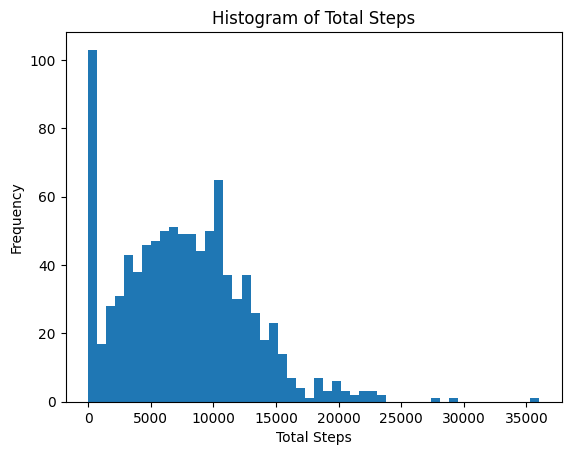

In [90]:
plt.hist(merged_daily['TotalSteps'], bins=50)
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Total Steps')
plt.show()

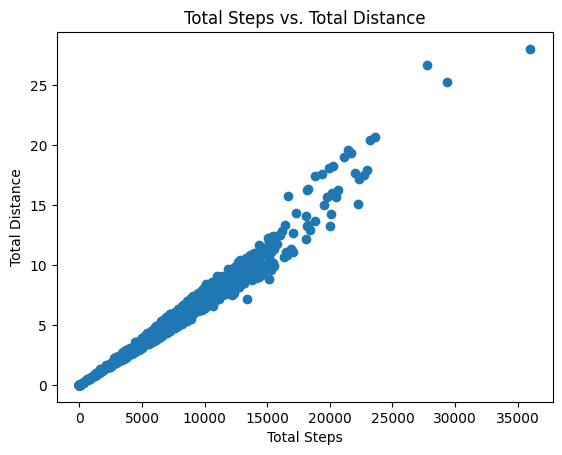

In [91]:
plt.scatter(merged_daily['TotalSteps'], merged_daily['TotalDistance'])
plt.xlabel('Total Steps')
plt.ylabel('Total Distance')
plt.title('Total Steps vs. Total Distance')
plt.show()

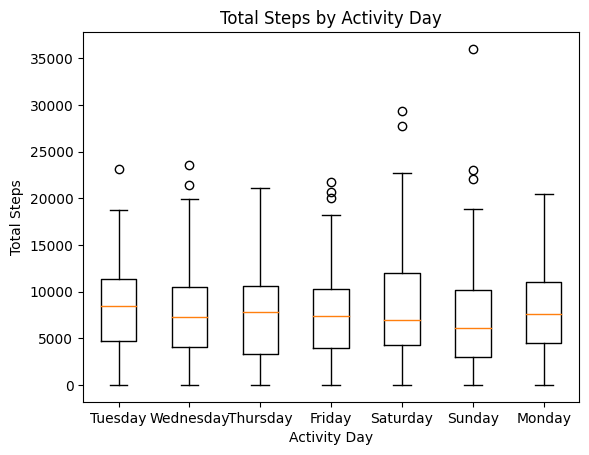

In [92]:
plt.boxplot([merged_daily[merged_daily['ActivityDay'] == day]['TotalSteps'] for day in merged_daily['ActivityDay'].unique()])
plt.xticks(range(1, len(merged_daily['ActivityDay'].unique()) + 1), merged_daily['ActivityDay'].unique())
plt.xlabel('Activity Day')
plt.ylabel('Total Steps')
plt.title('Total Steps by Activity Day')
plt.show()

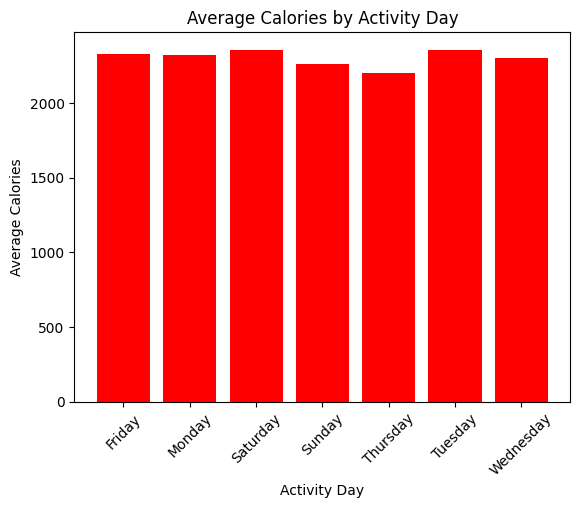

In [93]:
grouped_data = merged_daily.groupby('ActivityDay', observed=False)['Calories'].mean().reset_index()

plt.bar(grouped_data['ActivityDay'], grouped_data['Calories'], color = 'red')
plt.xlabel('Activity Day')
plt.ylabel('Average Calories')
plt.title('Average Calories by Activity Day')
plt.xticks(rotation=45)
plt.show()

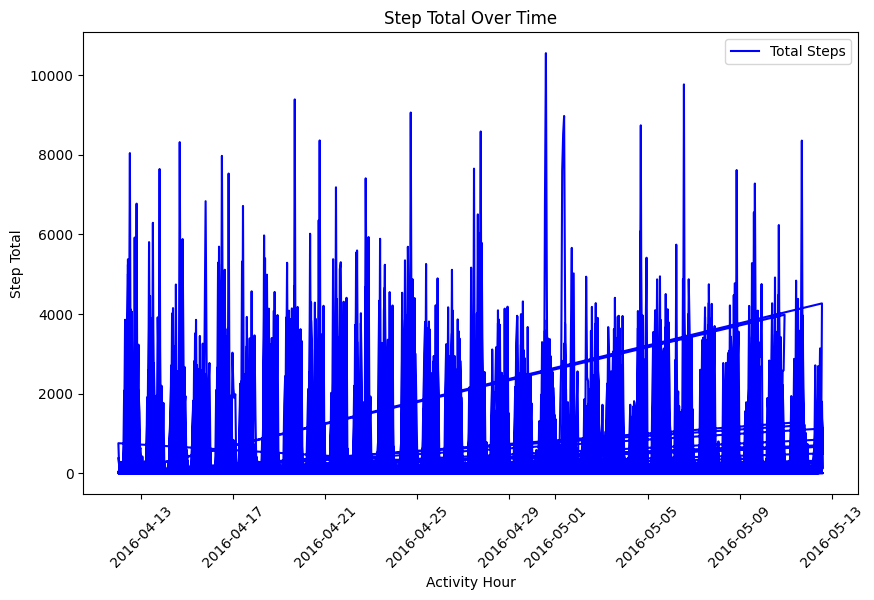

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(merged_hourly['ActivityHour'], merged_hourly['StepTotal'], color='blue', label='Total Steps')
plt.xlabel('Activity Hour')
plt.ylabel('Step Total')
plt.title('Step Total Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

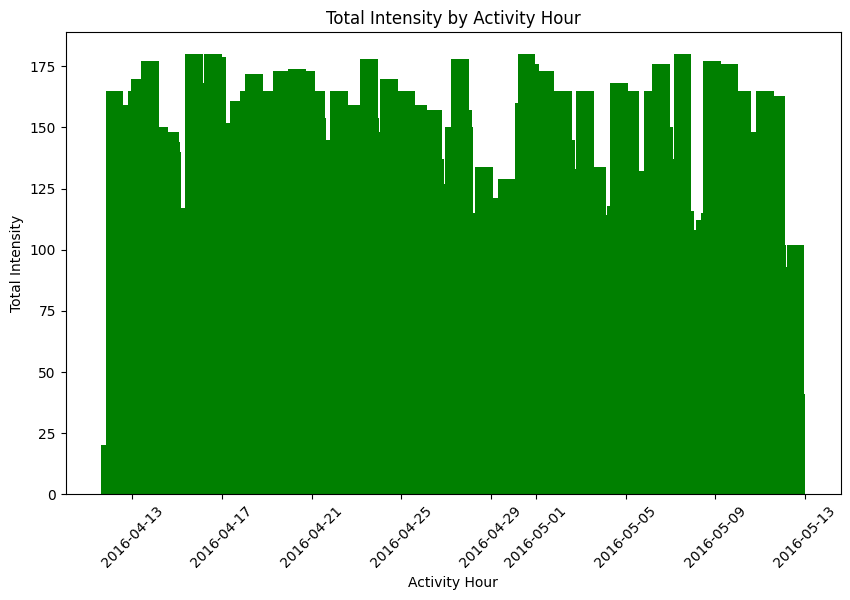

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(merged_hourly['ActivityHour'], merged_hourly['TotalIntensity'], color='green')
plt.xlabel('Activity Hour')
plt.ylabel('Total Intensity')
plt.title('Total Intensity by Activity Hour')
plt.xticks(rotation=45)
plt.show()

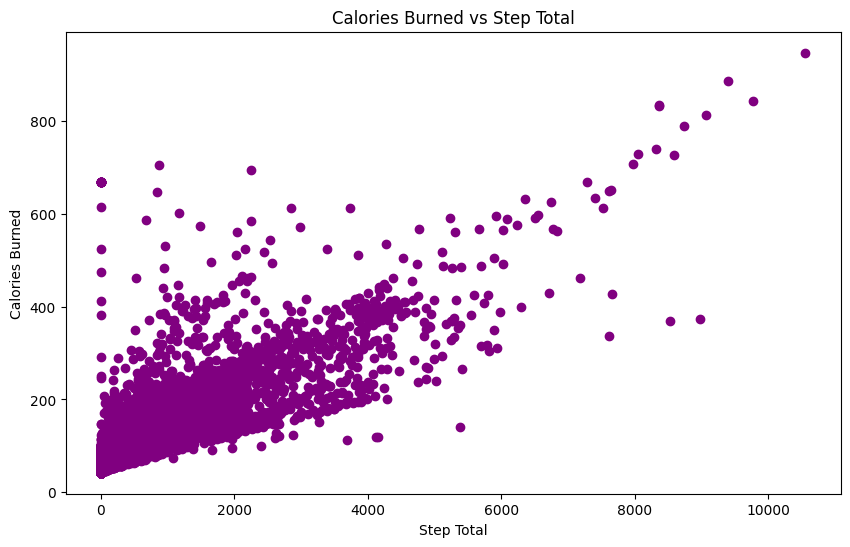

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_hourly['StepTotal'], merged_hourly['Calories'], color='purple')
plt.xlabel('Step Total')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs Step Total')
plt.show()

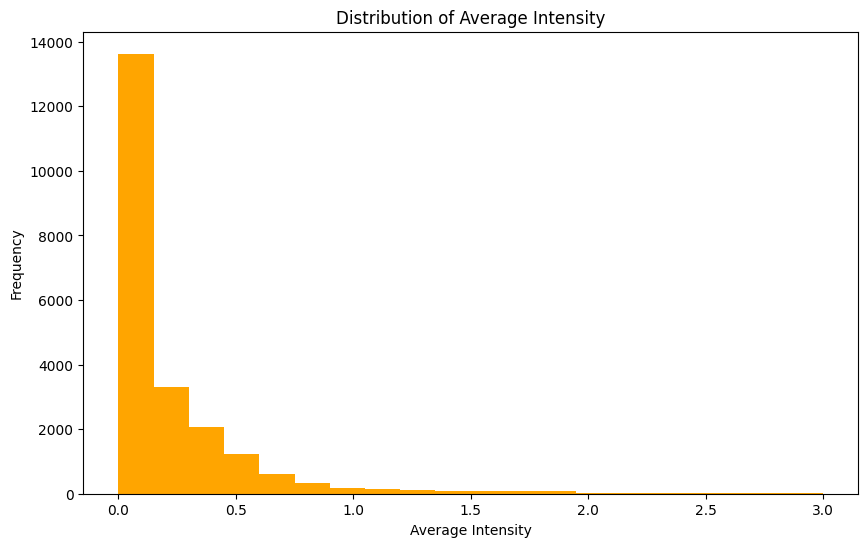

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(merged_hourly['AverageIntensity'], bins=20, color='orange')
plt.xlabel('Average Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Average Intensity')
plt.show()

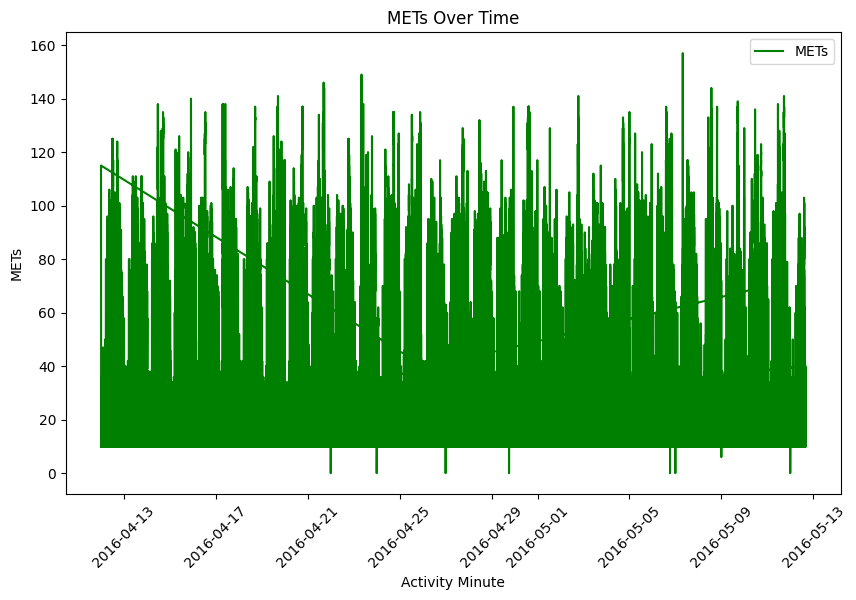

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(merged_minute_narrow['ActivityMinute'], merged_minute_narrow['METs'], color='green', label='METs')
plt.xlabel('Activity Minute')
plt.ylabel('METs')
plt.title('METs Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

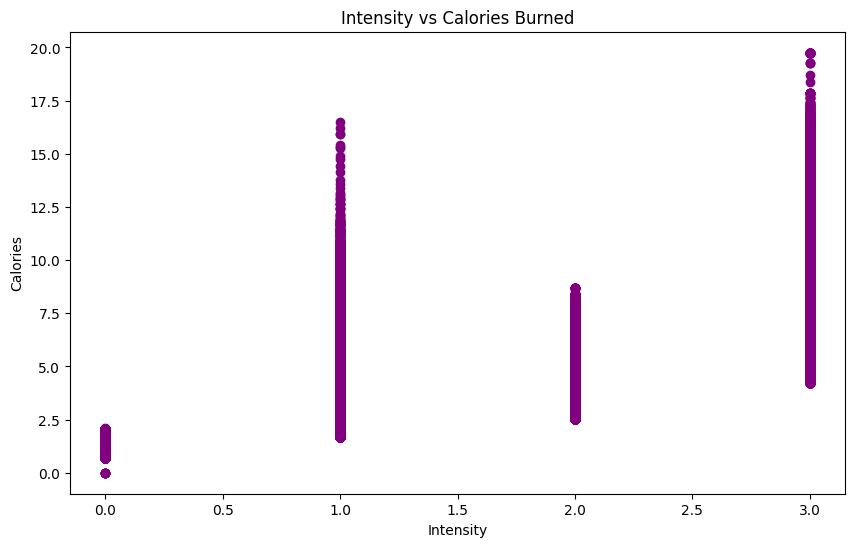

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_minute_narrow['Intensity'], merged_minute_narrow['Calories'], color='purple')
plt.xlabel('Intensity')
plt.ylabel('Calories')
plt.title('Intensity vs Calories Burned')
plt.show()

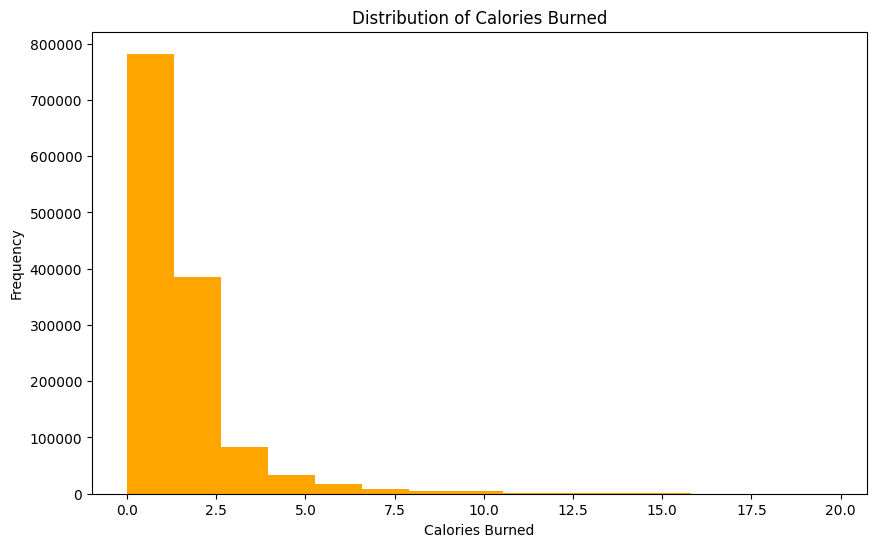

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(merged_minute_narrow['Calories'], bins=15, color='orange')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Burned')
plt.show()

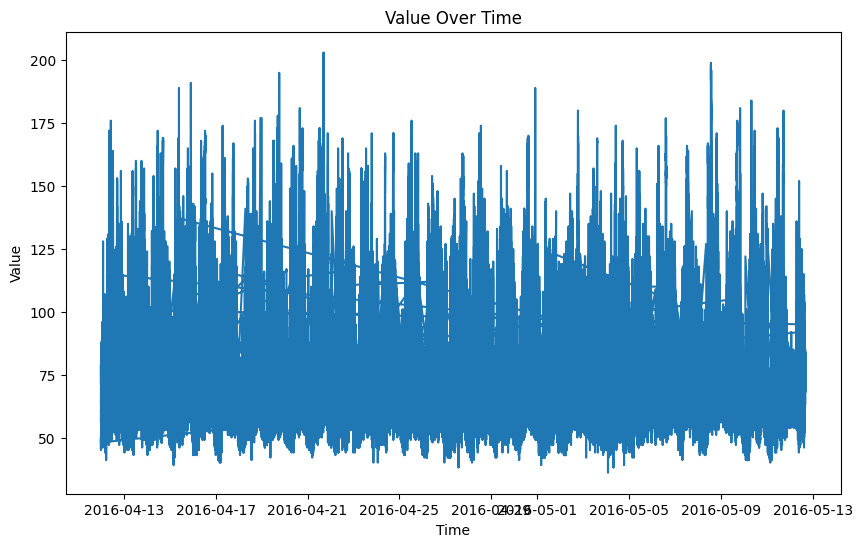

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(heartrate_seconds['Time'], heartrate_seconds['Value'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Value Over Time')
plt.show()

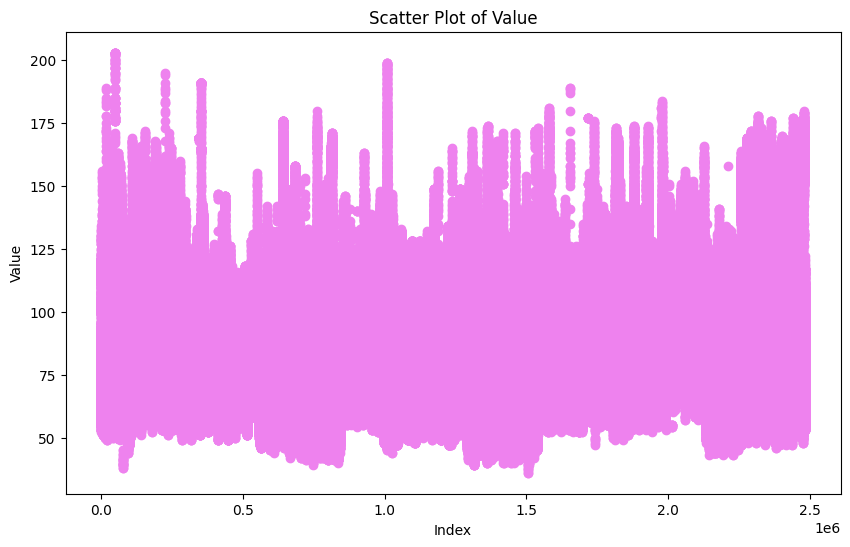

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(heartrate_seconds.index, heartrate_seconds['Value'], color='violet')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Value')
plt.show()

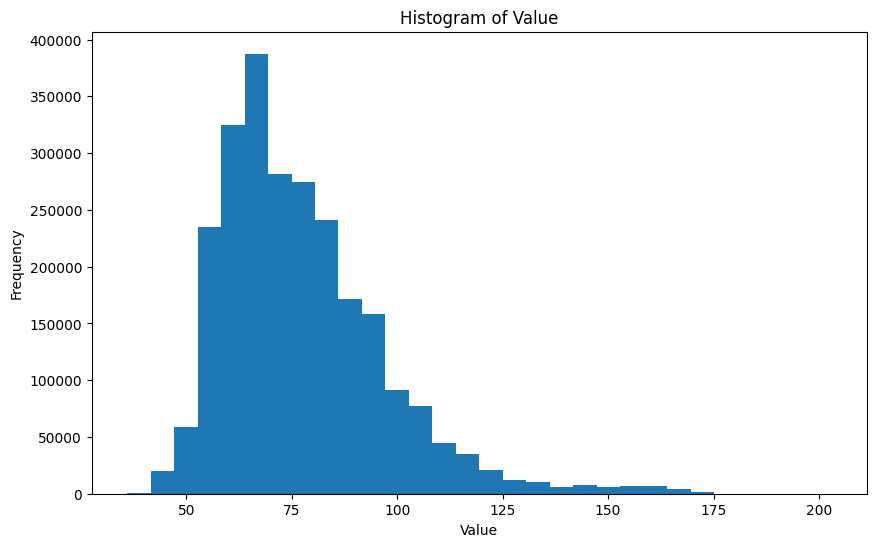

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(heartrate_seconds['Value'], bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

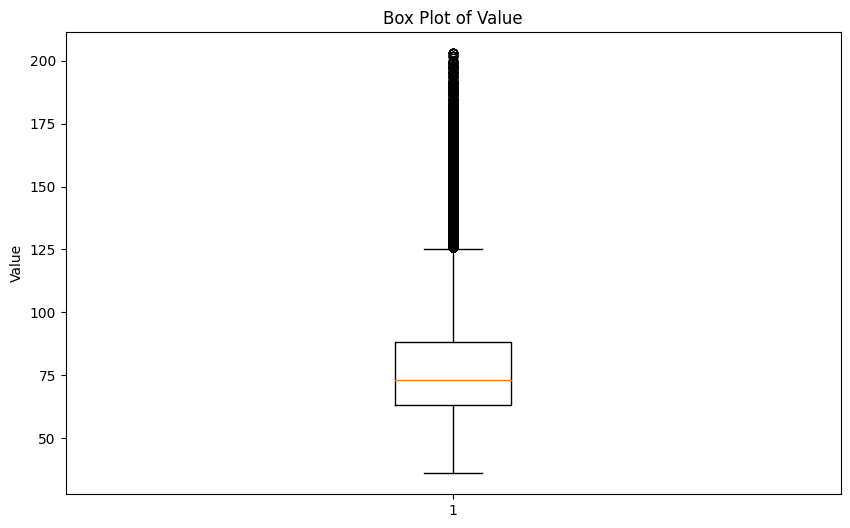

In [104]:
plt.figure(figsize=(10, 6))
plt.boxplot(heartrate_seconds['Value'])
plt.ylabel('Value')
plt.title('Box Plot of Value')
plt.show()

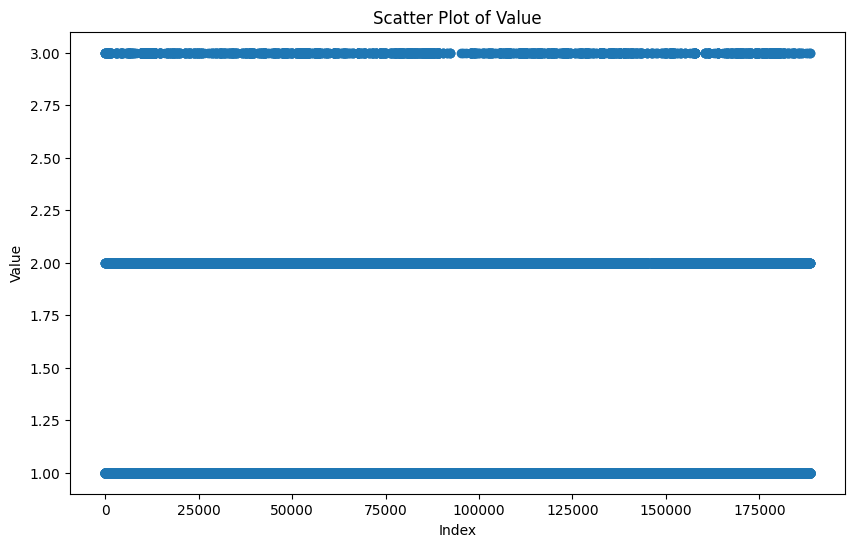

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(minuteSleep.index, minuteSleep['value'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Value')
plt.show()

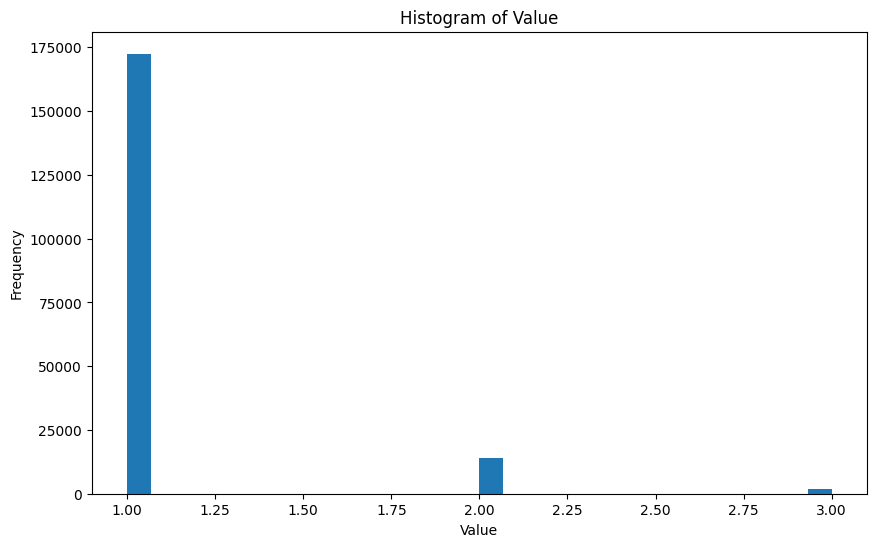

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(minuteSleep['value'], bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

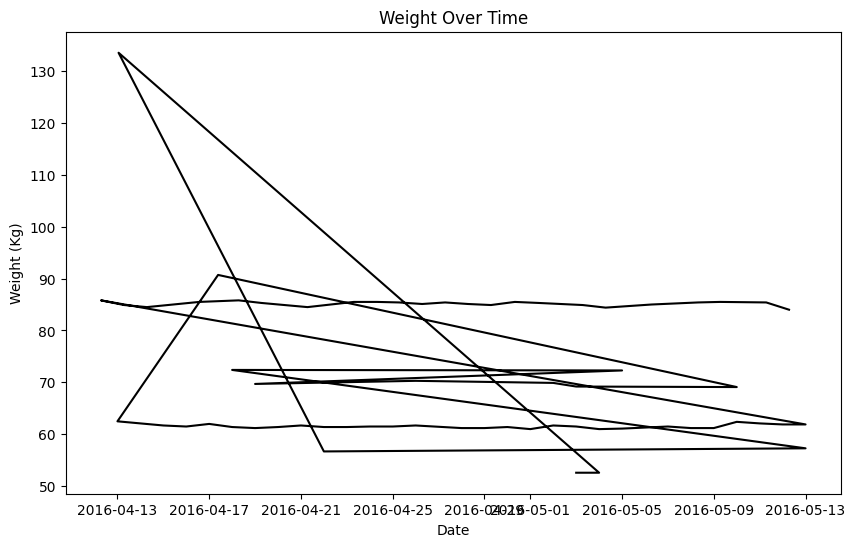

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(weightLogInfo['Date'], weightLogInfo['WeightKg'], color = 'black')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.title('Weight Over Time')
plt.show()

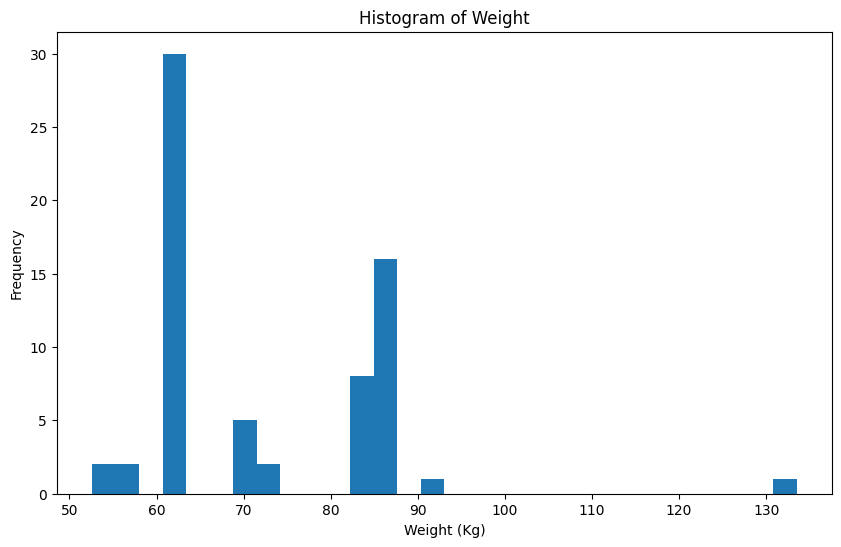

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(weightLogInfo['WeightKg'], bins=30)
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()

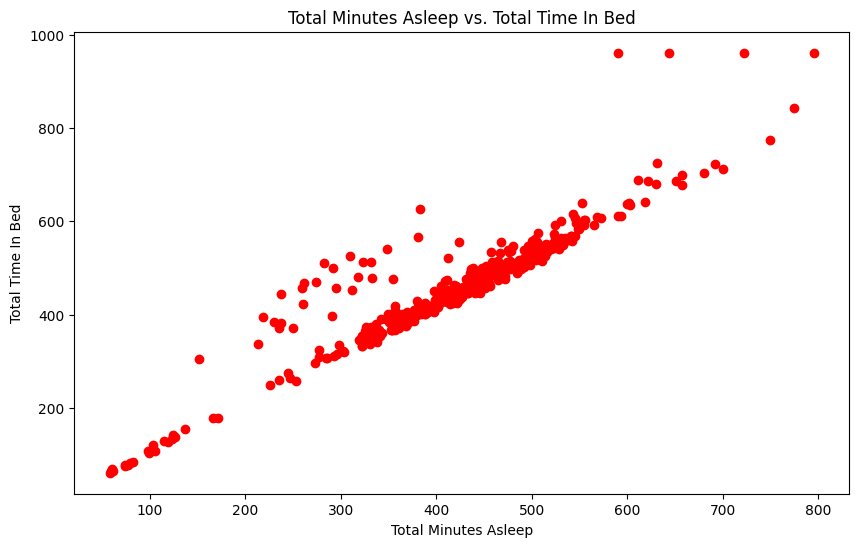

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(sleepDay['TotalMinutesAsleep'], sleepDay['TotalTimeInBed'], color = 'red')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time In Bed')
plt.title('Total Minutes Asleep vs. Total Time In Bed')
plt.show()

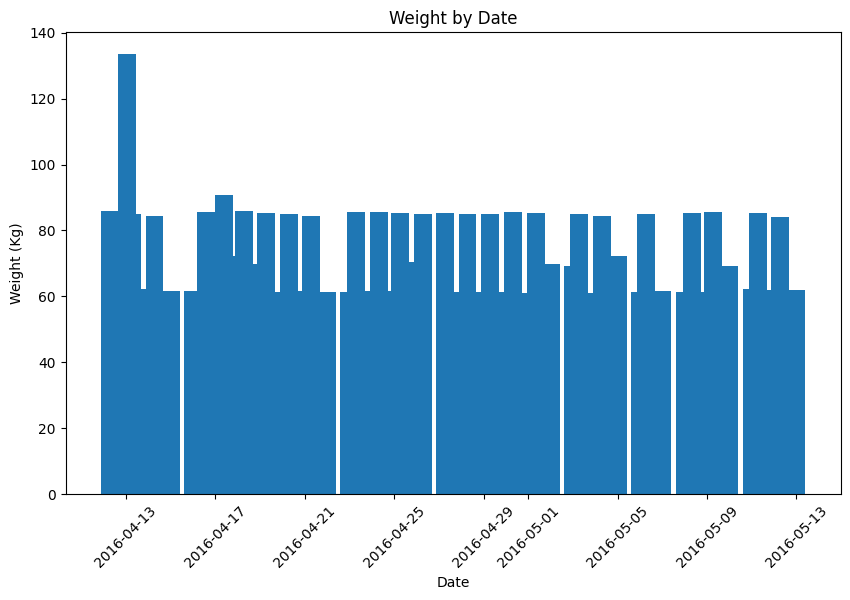

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(weightLogInfo['Date'], weightLogInfo['WeightKg'])
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.title('Weight by Date')
plt.xticks(rotation=45)
plt.show()

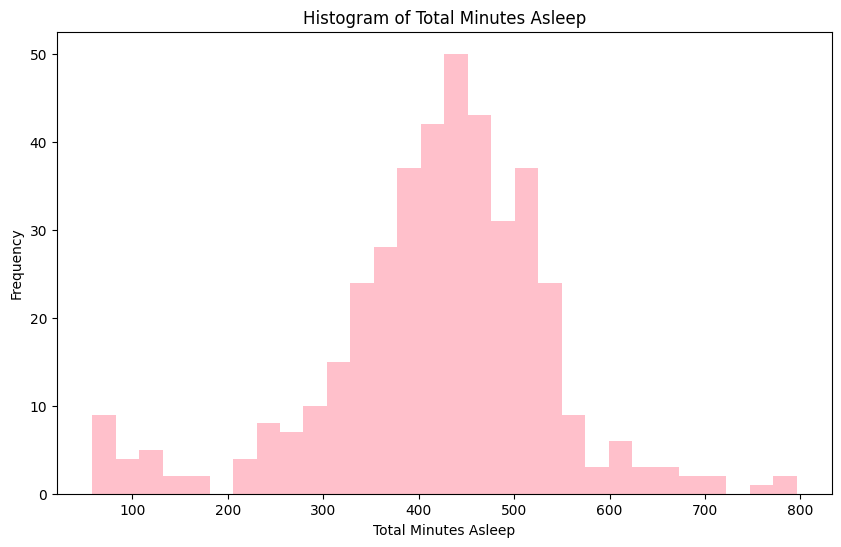

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(sleepDay['TotalMinutesAsleep'], bins=30, color = 'pink')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.title('Histogram of Total Minutes Asleep')
plt.show()